
<center> <img src="https://www.ufrn.br/resources/documentos/identidadevisual/brasao/brasao_flat.png" width="100" height="100"> </center>

## <center> IMPLEMENTAÇÃO DOS CÓDIGOS ESTUDADOS </center>




O presente arquivo tem por objetivo resumir os métodos e algoritmos estudados durante a disciplina de Tópicos Especiais em Inteligência Artificial ofertada pela UFRN.

---
- Universidade Federal do Rio Grande do Norte
- Docente responsável: José Alfredo Ferreira Costa
- Discente: Douglas Wilian Lima Silva
---

Este resumo foi pensado com base na definição dos contéudos, utilizando o método de seleção através da matrícula. Dessa forma, com a matrícula **20210022410**, serão abordados os algoritmos marcados abaixo.

- [$\hspace{0.4cm}$] Methods for machine learning
- [ **x** ] Data load for ML projects
- [$\hspace{0.4cm}$] Understanding data with statistics
- [ **x** ] Understanting data with visualization
- [$\hspace{0.4cm}$] Preparing data
- [ **x** ] Data feature selection
- [$\hspace{0.4cm}$] Introduction
- [ **x** ] Logistic regression
- [$\hspace{0.4cm}$] Support Vector Machine - SVM
- [ **x** ] Decision Tree
- [$\hspace{0.4cm}$] Naive Bayes
- [ **x** ] Random Forest
- [$\hspace{0.4cm}$] Regression algorithms - Overview
- [ **x** ] Linear regression
- [$\hspace{0.4cm}$] Clustering algorithms - Overview
- [ **x** ] Clustering algorithms - K-means
- [$\hspace{0.4cm}$] Clustering algorithms - Mean Shift Algorithm
- [ **x** ] Clustering algorithms - Hierarchical Clustering
- [$\hspace{0.4cm}$] KNN - K-Nearest Neighbors
- [ **x** ] Performance Metrics
- [$\hspace{0.4cm}$] Automatic Workflows
- [ **x** ] Improving performance of ML Models

---



### DATA LOAD FOR ML PROJECTS

#### - Base de dados WINE

In [1]:
#Importação usando pandas

from pandas import read_csv

diretorio = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

dados = read_csv(diretorio)
dados.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [2]:
#Podemos adicionar os headers

headers = [
    'Class',
    'Alcohol',
    'Malic_acid',
    'Ash',
    'Alcalinity_of_ash',
    'Magnesium',
    'Total_phenols',
    'Flavanoids',
    'Nonflavanoid_phenols',
    'Proanthocyanins',
    'Color_intensity',
    'Hue',
    'OD280_OD315_of_diluted_wines',
    'Proline'
]

ndados = read_csv(diretorio, names = headers)

display(ndados.head())
print(ndados.shape)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(178, 14)


###UNDERSTANDING DATA WITH VISUALIZATION

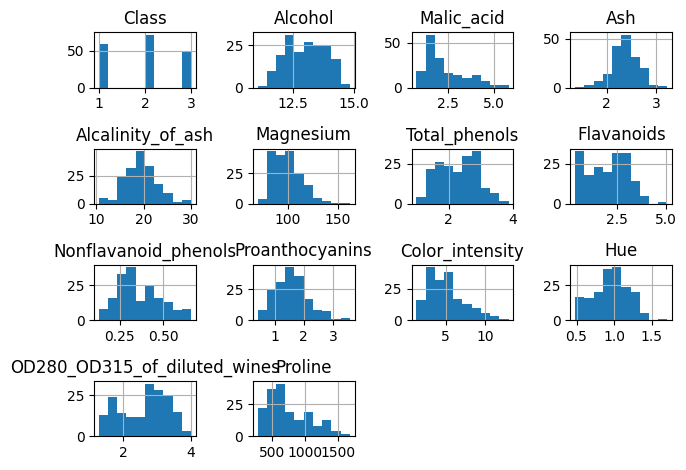

In [3]:
# Visualização com histograma
import matplotlib.pyplot as plt

ndados.hist()
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

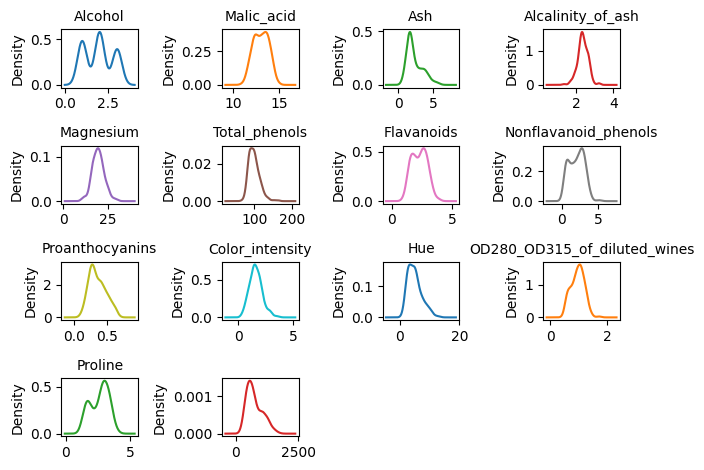

In [4]:
#Density plot
plt.figure(figsize=(20, 20))
ndados.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, legend=False)

#laço para ajustar os subplots, estavam ficando todos juntos
for i, col in enumerate(ndados.columns[1:]):
    plt.subplot(4, 4, i + 1)
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

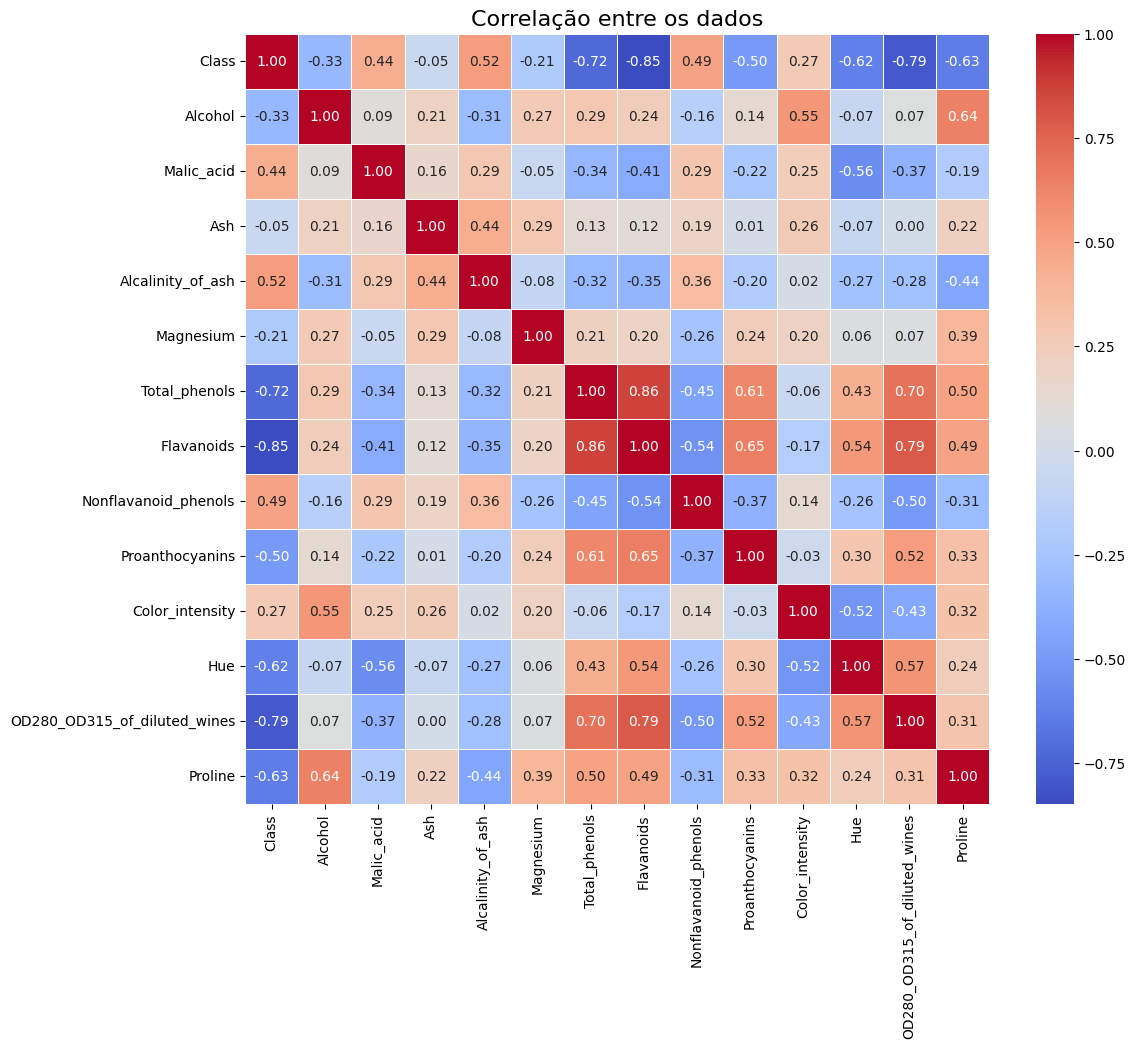

In [5]:
#Correlação entre os dados

import seaborn as sns

correlation_matrix = ndados.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre os dados', fontsize=16)

plt.show()

###DATA FEATURE SELECTION

###LOGISTIC REGRESSION

Neste método, os valores de alvo "target" pode assumir apenas dois valores 0 ou 1. Dessa forma, durante o processo é necessário fazer a conversão das classes para tais valores.

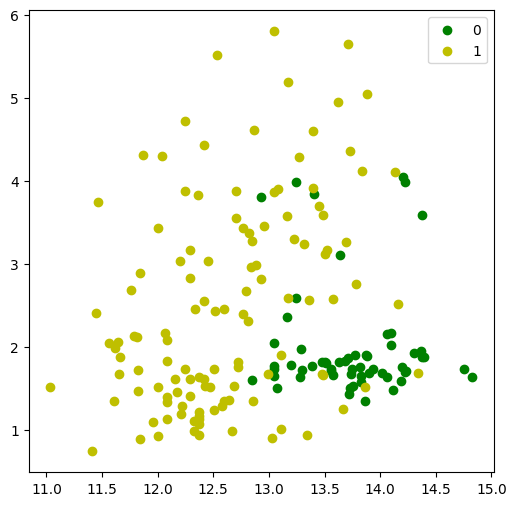

In [6]:
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

wine = load_wine()

X = pd.DataFrame(data=wine.data)
X['target'] = wine.target
x1 = X.to_numpy()
y = (wine.target!=0)*1 #Convertendo os valores das classes para binários

plt.figure(figsize=(6, 6))
plt.scatter(x1[y == 0][:, 0], x1[y == 0][:, 1], color='g', label='0')
plt.scatter(x1[y == 1][:, 0], x1[y == 1][:, 1], color='y', label='1')
plt.legend();


In [7]:
#Separação dos dados

indices=np.random.permutation(X.shape[0])
div = int(0.4*len(indices))
train_id, test_id = indices[:div],indices[div:]
ctrain, ctest = X.loc[train_id,:], X.loc[test_id,:]

xtrain = ctrain.drop('target', axis =1)
ytrain = (ctrain.target!=0)*1
xtest = ctest.drop('target', axis =1)
ytest = (ctest.target!=0)*1


regre = LogisticRegression(solver = 'liblinear')

regre.fit(xtrain, ytrain)

ypred = regre.predict(xtest)

mt = metrics.confusion_matrix(ytest, ypred)

print("Acurácia do modelo foi:",
metrics.accuracy_score(ytest, ypred)*100)


Acurácia do modelo foi: 98.13084112149532


Text(0.5, 1.0, 'Matriz de Confusão')

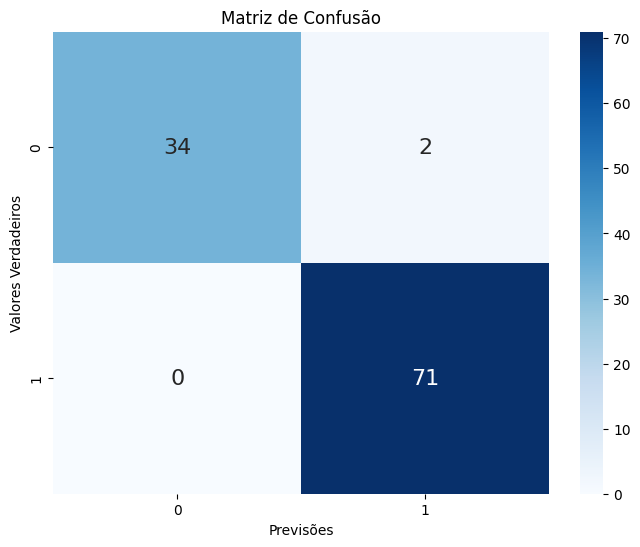

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(mt, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')

### DECISION TREE

In [9]:
#importacao da base de dados + bibliotecas

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

data = load_wine()

df = pd.DataFrame(data = data.data, columns = data['feature_names'])
df['target'] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
#Normalização dos dados

m = MinMaxScaler()
normalized = pd.DataFrame(m.fit_transform(df), columns = df.columns)
normalized['target'] = df.target

normalized.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [11]:
#Separação dos dados

i=np.random.permutation(normalized.shape[0])
d = int(0.4*len(i))
train, test = i[:d],i[d:]
TR, TS = normalized.loc[train,:], normalized.loc[test,:]

xtrain1 = TR.drop('target', axis =1)
ytrain1 = TR.target
xtest1 = TS.drop('target', axis =1)
ytest1 = TS.target


In [12]:
#Classificador

classifier = DecisionTreeClassifier()

classifier = classifier.fit(xtrain1, ytrain1)

ypred1 = classifier.predict(xtest1)

acc = accuracy_score(ytest1, ypred1)

print(f"A acurácia do modelo foi de {acc*100:.4f} %")

A acurácia do modelo foi de 86.9159 %


Text(0.5, 1.0, 'Matriz de Confusão')

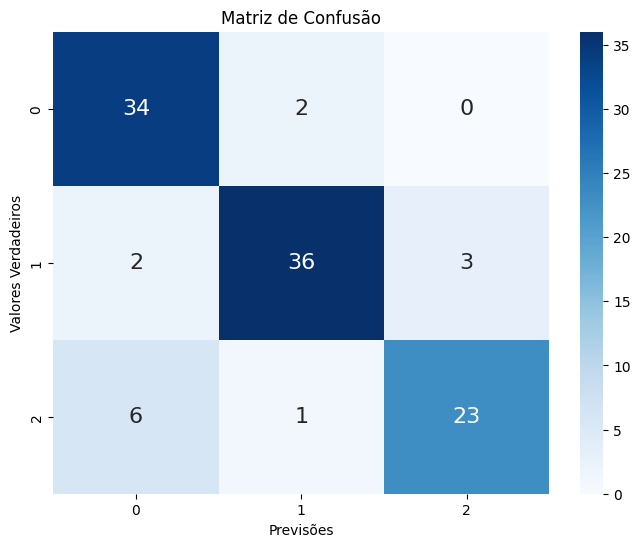

In [13]:
#Matriz de confusão

cm = confusion_matrix(ytest1, ypred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')

In [14]:
#estatísticas

result1 = classification_report(ytest1, ypred1)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        36
           1       0.92      0.88      0.90        41
           2       0.88      0.77      0.82        30

    accuracy                           0.87       107
   macro avg       0.87      0.86      0.86       107
weighted avg       0.87      0.87      0.87       107



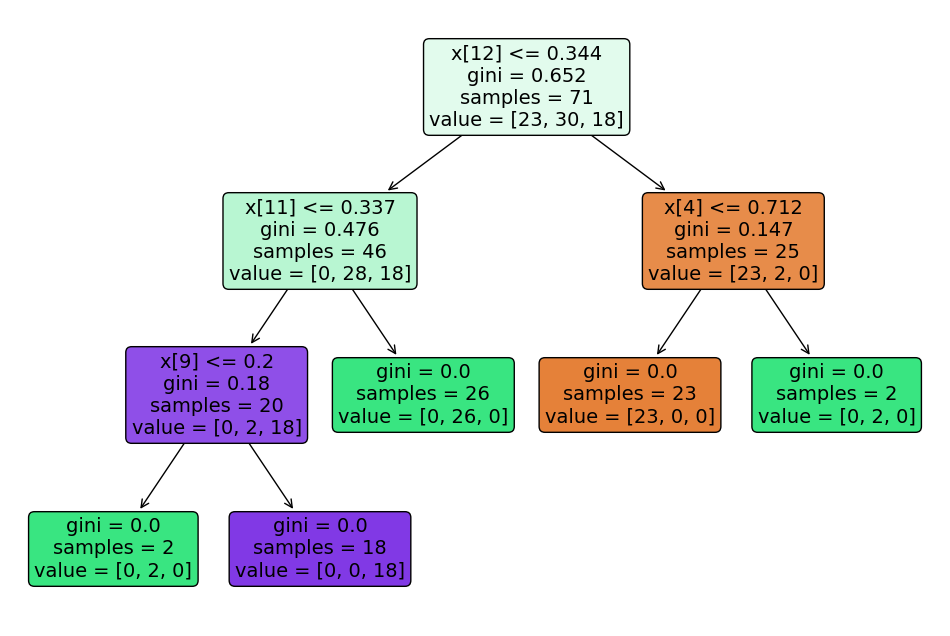

In [15]:
# Visualização da arvore
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=None, class_names=None, rounded=True)
plt.show()

###RANDOM FOREST CLASSIFIER

Consiste na realização de um conjunto de árvores de decisão nos dados selecionados, para então realizar uma votação da melhor solução obtida entre elas, apresentando assim a predição.

PRÓS:

- Supera problemas de overfitting (Especificação para o conjunto de dados), já que utiliza a média do resultado de diversas árvores.

- Funciona bem com variabilidade dos dados.

- Não requer necessariamente um escalonamento dos dados.


CONTRAS:

- Maior complexidade.

- Maior uso de recursos computacionais.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

load = load_wine()

n = MinMaxScaler()

data = pd.DataFrame(n.fit_transform(load.data))

data.columns, data['target'] = load['feature_names'], load.target

data.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [17]:
#Separação das classes

i=np.random.permutation(data.shape[0])
d = int(0.4*len(i))
train, test = i[:d],i[d:]
TR, TS = data.loc[train,:], data.loc[test,:]

xtrain2 = TR.drop('target', axis =1)
ytrain2 = TR.target
xtest2 = TS.drop('target', axis =1)
ytest2 = TS.target


cl = RandomForestClassifier()
cl.fit(xtrain2, ytrain2)

pred = cl.predict(xtest2)

acuracia = accuracy_score(ytest2, pred)

cfm = confusion_matrix(ytest2, pred)

result = classification_report(ytest2, pred)

print(f'A acurácia do modelo foi {acuracia*100:.4f} %\n')

print('Classification Report\n')
print(result)

A acurácia do modelo foi 98.1308 %

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.95      0.98        44
           2       0.97      1.00      0.98        28

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107



Text(0.5, 1.0, 'Matriz de Confusão')

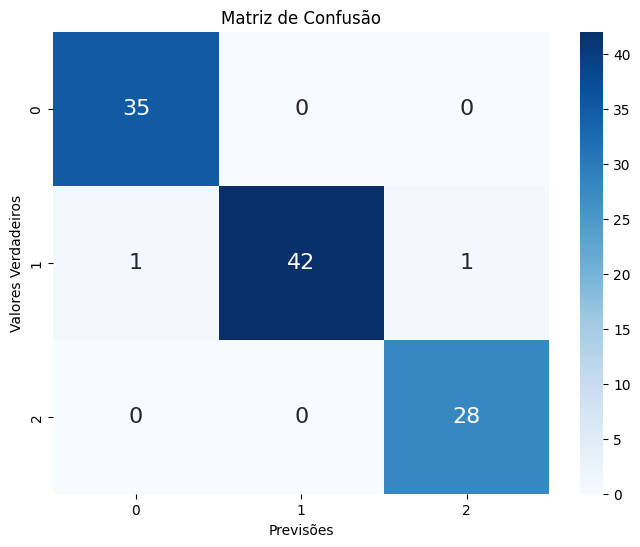

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')

###COMPARAÇÃO DAS ACURÁCIAS ENTRE OS MODELOS SEM ESCALONAMENTO DOS DADOS.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

load = load_wine()

data1 = pd.DataFrame(data = load.data)

data1.columns, data1['target'] = load['feature_names'], load.target

data1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [20]:
#Separação das classes

i=np.random.permutation(data1.shape[0])
d = int(0.4*len(i))
train, test = i[:d],i[d:]
TR, TS = data1.loc[train,:], data1.loc[test,:]

xtrain3 = TR.drop('target', axis =1)
ytrain3 = TR.target
xtest3 = TS.drop('target', axis =1)
ytest3 = TS.target

#RANDOM FOREST
cl = RandomForestClassifier()
cl.fit(xtrain3, ytrain3)

pred = cl.predict(xtest3)

acuracia = accuracy_score(ytest3, pred)


#INDIVIDUAL TREE

clf = DecisionTreeClassifier()
clf.fit(xtrain3, ytrain3)

pred1 = clf.predict(xtest3)

acuracia1 = accuracy_score(ytest3, pred1)


print('\t\tRESULTADOS\n')


print('RANDOM FOREST:\n')
print(f'A acurácia do modelo foi {acuracia*100:.4f} %\n')

print('INDIVIDUAL TREE:\n')
print(f'A acurácia do modelo foi {acuracia1*100:.4f} %\n')


		RESULTADOS

RANDOM FOREST:

A acurácia do modelo foi 99.0654 %

INDIVIDUAL TREE:

A acurácia do modelo foi 83.1776 %



###LINEAR REGRESSION

- REGRESSÃO LINEAR SIMPLES


A regressão linear é definida como uma reta:

\begin{align*}
 y = ax + b
\end{align*}

Em que o coeficiente $b$ é dado por:
\begin{align*}
 b = \dfrac{S_{xy}}{S_{xx}}
\end{align*}

Sendo $S_{xy}$ e $S_{xx}$ por sua vez:
\begin{align*}
 S_{xx} = \sum x_i^2 - \dfrac{\left(\sum x_i\right)^2}{n}
\end{align*}

\begin{align*}
 S_{xx} = \sum x_iy_i - \dfrac{\sum x_i\sum y_i}{n}
\end{align*}

Esse será o algoritmo implementado.

---

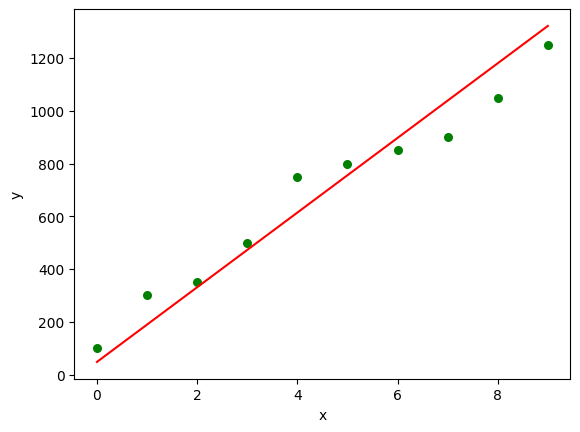

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def coefB(x, y):
  n = np.size(x)
  mediax, mediay = np.mean(x), np.mean(y)

  #IMPLEMENTAÇÃO DAS FORMULAS APRESENTADAS
  S_xx = np.sum(x**2) - mediax*mediax
  S_xy = np.sum(x*y) - mediax*mediay

  b = S_xy/S_xx
  a = mediay - b*mediax

  return(a, b)

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([100, 300, 350, 500, 750, 800, 850, 900, 1050, 1250])

a, b = coefB(x, y)

ypred = a + b*x

plt.scatter(x, y, color = "g", marker = "o", s = 30)
plt.plot(x, ypred, color = "r")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- REGRESSÃO LINEAR MÚLTIPLA

Para esse caso, utilizaremos a Scikit-Learn, através da importação da biblioteca linear_model.

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression

vinho = datasets.load_wine()

dframe = pd.DataFrame(data = vinho.data, columns = vinho['feature_names'])
dframe['target'] = vinho.target
dframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Coeficients:
 [-1.27143547e-01 -1.31476224e-02  1.12222605e-01  4.31163693e-02
 -3.05067401e-04  9.34192168e-02 -3.36539457e-01 -3.84353174e-01
  1.26941270e-01  4.28696290e-02 -3.63432521e-01 -3.21281433e-01
 -6.46093748e-04]
Variance score: 0.8773194856127493


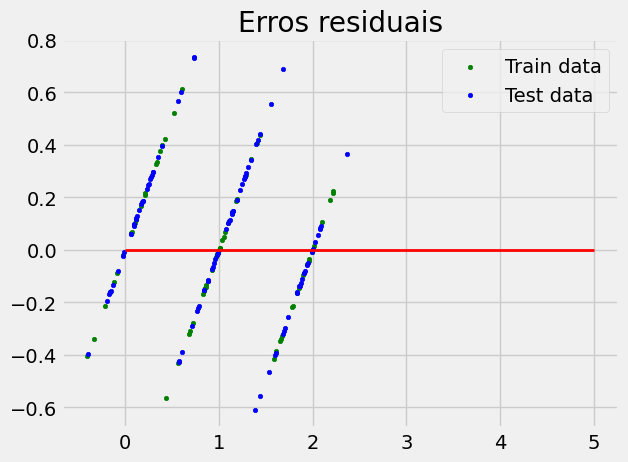

In [23]:
i = np.random.permutation(dframe.shape[0])
d = int(0.4 * len(i))
train, test = i[:d], i[d:]
TR, TS = dframe.loc[train, :], dframe.loc[test, :]

xtrain3 = TR.drop('target', axis=1)
ytrain3 = TR.target
xtest3 = TS.drop('target', axis=1)
ytest3 = TS.target

reg = LinearRegression()

reg.fit(xtrain3, ytrain3)

print('Coeficients:\n', reg.coef_)

variance_score = reg.score(xtest3, ytest3)
print('Variance score: {}'.format(variance_score))

plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(xtrain3), reg.predict(xtrain3) - ytrain3, color="green", s=10, label='Train data')
plt.scatter(reg.predict(xtest3), reg.predict(xtest3) - ytest3, color="blue", s=10, label='Test data')
plt.hlines(y=0, xmin=0, xmax=5, linewidth=2, color='r')
plt.legend(loc='upper right')
plt.title("Erros residuais")
plt.show()


###CLUSTERING - K-MEANS ALGORITHM

Consiste em calcular o melhor centróide entre um conjunto de dados para assim realizar os agrupamentos com base menor distância quadrática entre os dados e o centróide.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


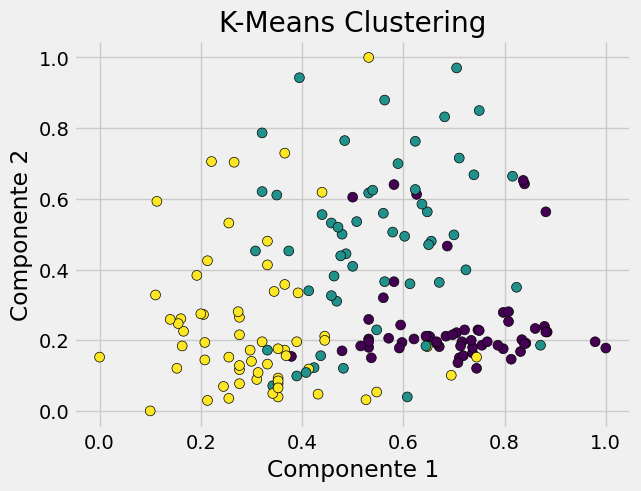

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

wine = datasets.load_wine()
X = wine.data
y = wine.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


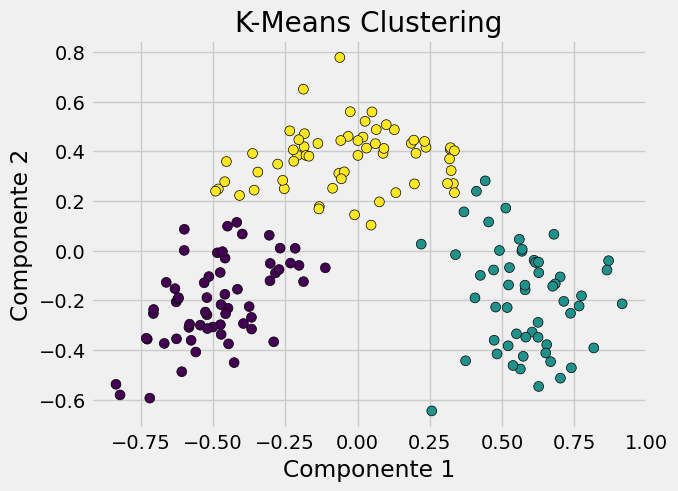

In [25]:
#reduzindo a dimensionalidade com o PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

###HIERARCHICAL CLUSTERING

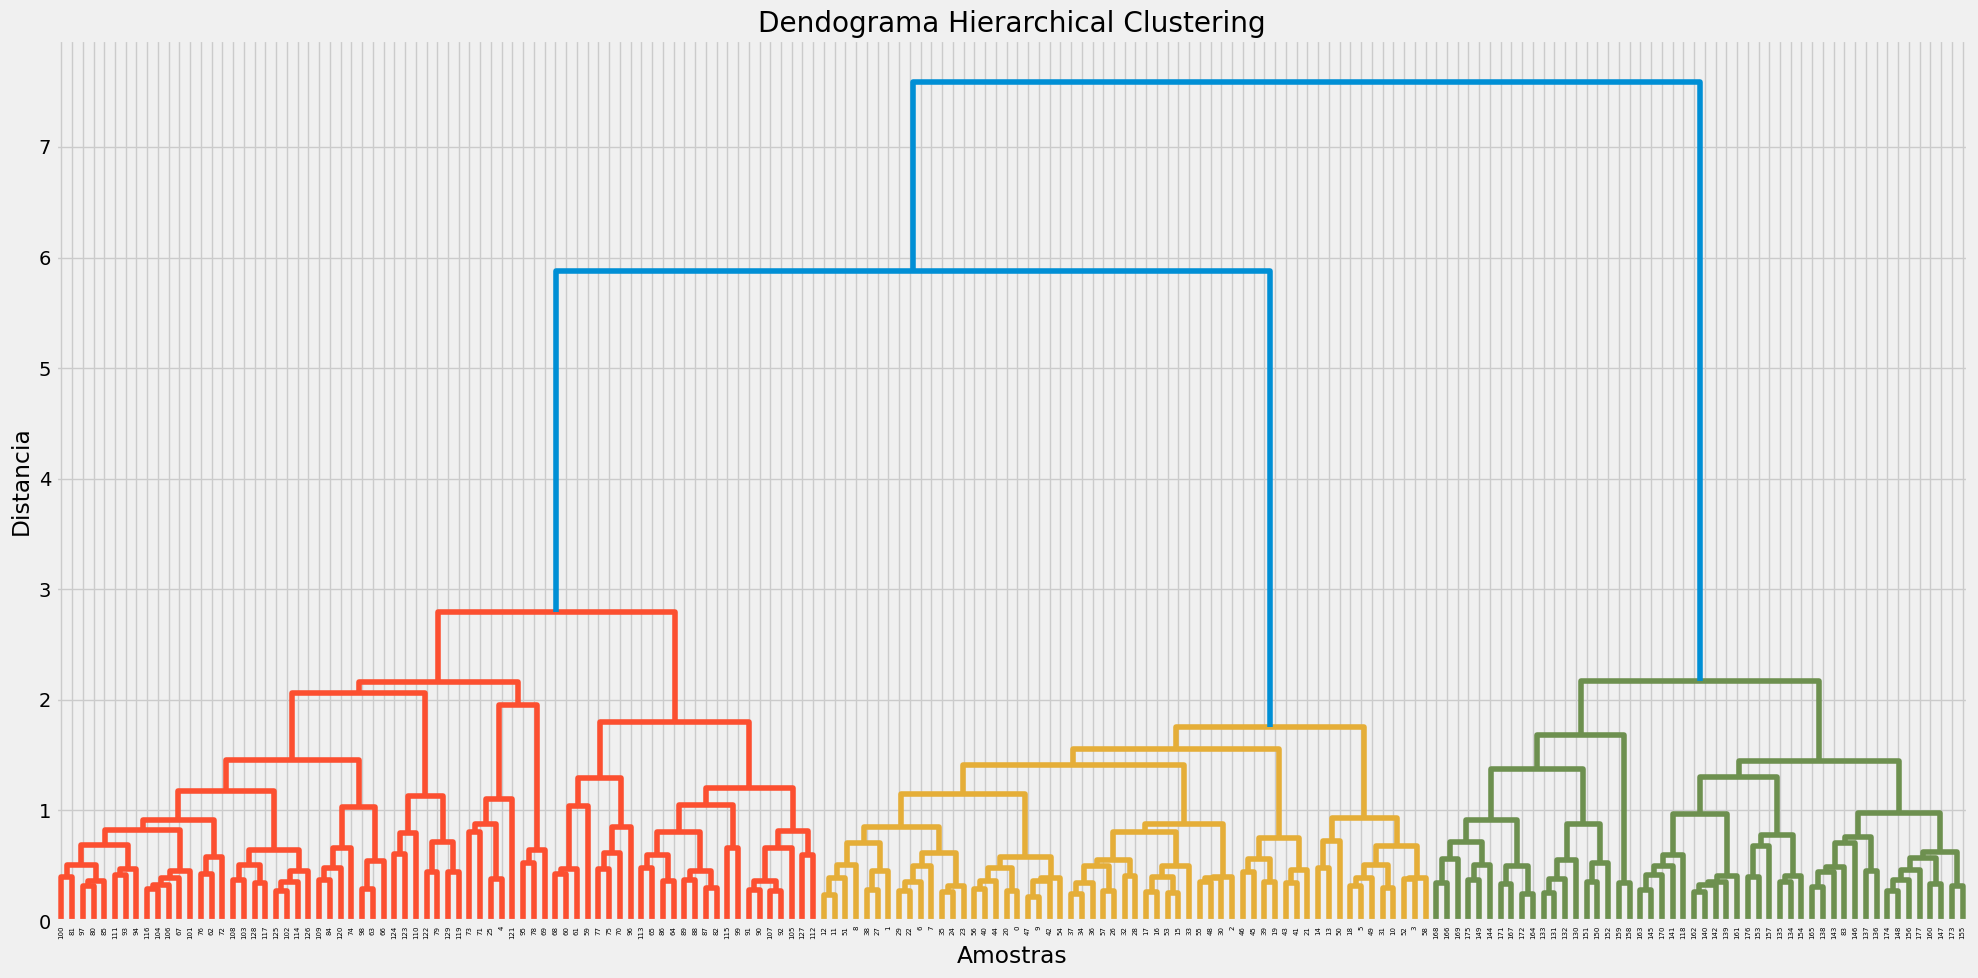

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

wine = load_wine()
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

linkage = linkage(data_scaled, method='ward')

plt.figure(figsize=(20, 10))
dendrogram(linkage, labels=data.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma Hierarchical Clustering')
plt.xlabel('Amostras')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

num_clusters = 3
cluster_model = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
clusters = cluster_model.fit_predict(data_scaled)



In [27]:
data['Cluster'] = clusters

print(data[['Cluster']])

     Cluster
0          2
1          2
2          2
3          2
4          0
..       ...
173        1
174        1
175        1
176        1
177        1

[178 rows x 1 columns]


###PERFORMANCE METRICS



Este capítulo trata acerca das medições realizadas para verificação da performance do modelo de ML testado. Basicamente, em quase todos os algoritmos implementados acima foi realizada tal análise. Seja através da matriz de confusão dos resultados, cálculo da acurácia ou utilizando o classification.report para visualizar os dados de forma mais detalhada.

###IMPROVING ML MODELS



> BAGGING RANDOM FOREST



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

vinho = datasets.load_wine()

dframe = pd.DataFrame(data = vinho.data, columns = vinho['feature_names'])
dframe['target'] = vinho.target
dframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [29]:
x = dframe.drop('target', axis=1)
y = dframe.target

kfold = KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=100)

results = cross_val_score(model, x, y, cv=kfold)
print(f'{results.mean()*100:.4f} %')

96.1111 %
